# Train a model

Although we are using a pre-trained model, we need to adapt it for our usecase at hand, namely identifying if an object is a dog, or a a cattle. 

Steps: 
    
    1. take the existing model, which predicts 600 objects
    2. Filter out all predictions which are not dog or cattle
    3. If object is predicted as both dog and cattle, return the highest prediction
        4. is there a way to see 'how much percentage dog' the model thought the image was, even if it's identified as cattle? (and vice versa) 

In [ ]:
predict(data)

In [ ]:
import sys
!pip install -r requirements.txt

In [5]:
import tensorflow as tf
import base64

model_dir = 'models/openimages_v4_ssd_mobilenet_v2_1'
saved_model = tf.saved_model.load(model_dir)
detector = saved_model.signatures['default']



def predict(body):
    base64img = body.get('image')
    img_bytes = base64.decodebytes(base64img.encode())
    detections = detect(img_bytes)
    cleaned = clean_detections(detections)
    
    return { 'detections': cleaned }


def detect(img):    
    image = tf.image.decode_jpeg(img, channels=3)
    converted_img  = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...]
    result = detector(converted_img)
    num_detections = len(result["detection_scores"])
    
    output_dict = {key:value.numpy().tolist() for key, value in result.items()}
    output_dict['num_detections'] = num_detections
    
    return output_dict


def clean_detections(detections):
    cleaned = []

    num_detections = detections['num_detections']

    for i in range(0, num_detections):
        label = detections['detection_class_entities'][i].decode('utf-8')
        score = detections['detection_scores'][i]
        if (label == 'Dog' or label == 'Cattle') and score>0.3:
            d = {
                'box': {
                    'yMin': detections['detection_boxes'][i][0],
                    'xMin': detections['detection_boxes'][i][1],
                    'yMax': detections['detection_boxes'][i][2],
                    'xMax': detections['detection_boxes'][i][3]
                },
                'class': label,
                'label': label,
                'score': score,
            }
            cleaned.append(d)

    return cleaned

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [6]:
import json

with open('sample-requests/twodogs.json') as json_file:
    data = json.load(json_file)
    
result = predict(data)

print(result['detections'])

[{'box': {'yMin': 0.06668734550476074, 'xMin': 0.059880733489990234, 'yMax': 0.9051148295402527, 'xMax': 0.5364789962768555}, 'class': 'Dog', 'label': 'Dog', 'score': 0.8483346700668335}, {'box': {'yMin': 0.32391250133514404, 'xMin': 0.5251951813697815, 'yMax': 0.9843556880950928, 'xMax': 0.9758182168006897}, 'class': 'Dog', 'label': 'Dog', 'score': 0.7970173358917236}]


In [ ]:
data

In [10]:
import json
import base64

tester={}
with open('twodogs.jpg', mode='rb') as file:
    img = file.read()
tester['image'] = base64.encodebytes(img).decode('utf-8')


In [11]:
testing = predict(tester)

In [12]:
testing

{'detections': [{'box': {'yMin': 0.06668734550476074,
    'xMin': 0.059880733489990234,
    'yMax': 0.9051148295402527,
    'xMax': 0.5364789962768555},
   'class': 'Dog',
   'label': 'Dog',
   'score': 0.8483346700668335},
  {'box': {'yMin': 0.32391250133514404,
    'xMin': 0.5251951813697815,
    'yMax': 0.9843556880950928,
    'xMax': 0.9758182168006897},
   'class': 'Dog',
   'label': 'Dog',
   'score': 0.7970173358917236}]}

In [22]:
%matplotlib inline
import os
images_path = 'sample-jpgs'
for filename in os.listdir(images_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        print(filename)
        file  = os.path.join(images_path, filename)
        print(file)
        with open(file, mode='rb') as file:
            img = file.read()
        img_dec = {}
        img_dec['image'] = base64.encodebytes(img).decode('utf-8')
        preds = predict(img_dec)
        print(preds["detections"])
    

#tester['image'] = base64.encodebytes(img).decode('utf-8')
#    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
#        vehicle, LpImg, license_plate_string = lpr_process(os.path.join(images_path, filename))
        # Display the result
#        fig = plt.figure(figsize=(12,6))
#        fig.add_subplot(1,2,1)
#        plt.axis(False)
#        plt.imshow(vehicle);
#        fig.add_subplot(1,2,2)
#        plt.axis(False)
#        plt.imshow(LpImg[0]);
#        plt.show()
#        print('Detected plate number: ' + license_plate_string)
#print('-------------------------------------')

cows3.jpeg
sample-jpgs/cows3.jpeg
[]
cow.jpg
sample-jpgs/cow.jpg
[{'box': {'yMin': 0.2886313498020172, 'xMin': 0.11675292253494263, 'yMax': 0.8475040197372437, 'xMax': 0.8546733260154724}, 'class': 'Cattle', 'label': 'Cattle', 'score': 0.5590227246284485}]
dogcow.jpg
sample-jpgs/dogcow.jpg
[{'box': {'yMin': 0.05151653289794922, 'xMin': 0.0, 'yMax': 0.9994245767593384, 'xMax': 0.96807861328125}, 'class': 'Dog', 'label': 'Dog', 'score': 0.8640767335891724}, {'box': {'yMin': 0.3536231815814972, 'xMin': 0.1927025318145752, 'yMax': 0.9756002426147461, 'xMax': 0.9317007064819336}, 'class': 'Dog', 'label': 'Dog', 'score': 0.34491997957229614}]
cowanddog1.jpg
sample-jpgs/cowanddog1.jpg
[{'box': {'yMin': 0.20463553071022034, 'xMin': 0.18867161870002747, 'yMax': 0.9829907417297363, 'xMax': 0.5349208116531372}, 'class': 'Cattle', 'label': 'Cattle', 'score': 0.5885506272315979}]


In [23]:
import tensorflow as tf

import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont

import matplotlib.pyplot as plt

In [159]:
def display_image(image):
  fig = plt.figure(figsize=(10, 10))
  plt.grid(False)
  plt.imshow(image)


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.60):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    label = class_names[i]
    #print(label)
    label = label.decode("utf-8") 
    if (label == 'Dog' or label == 'Cattle') and scores[i] >= min_score:
    #    print('success')
    #if scores[i] >= min_score:
        ymin, xmin, ymax, xmax = tuple(boxes[i])
        
        display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
        color = colors[hash(class_names[i]) % len(colors)]
        image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
        draw_bounding_box_on_image(
              image_pil,
              ymin,
              xmin,
              ymax,
              xmax,
              color,
              font,
              display_str_list=[display_str])
        np.copyto(image, np.array(image_pil))
  return image
  return x

In [160]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [161]:
def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

  result = detector(converted_img)
  #print(result)

  result = {key:value.numpy() for key,value in result.items()}

  #print("Found %d objects." % len(result["detection_scores"]))


  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

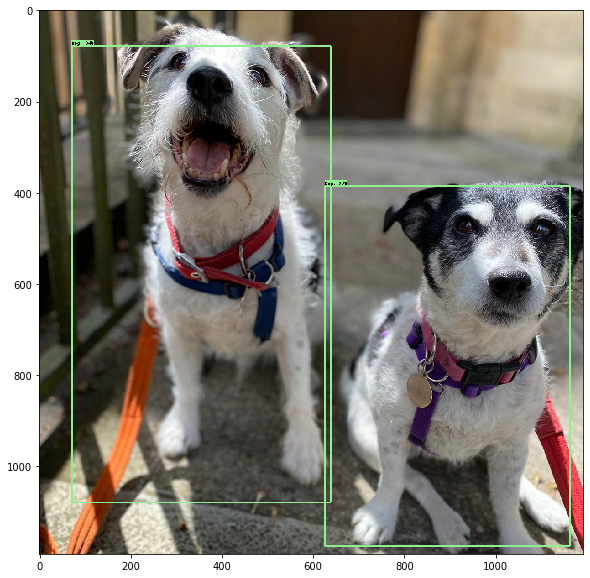

In [162]:
dog_img = 'twodogs.jpg'
run_detector(detector, dog_img)

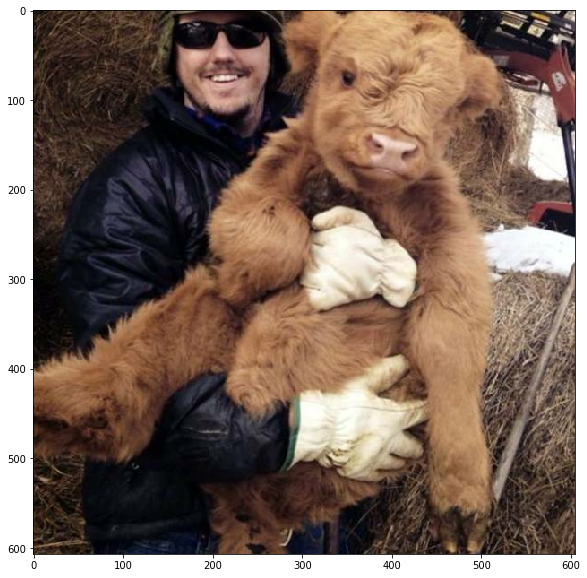

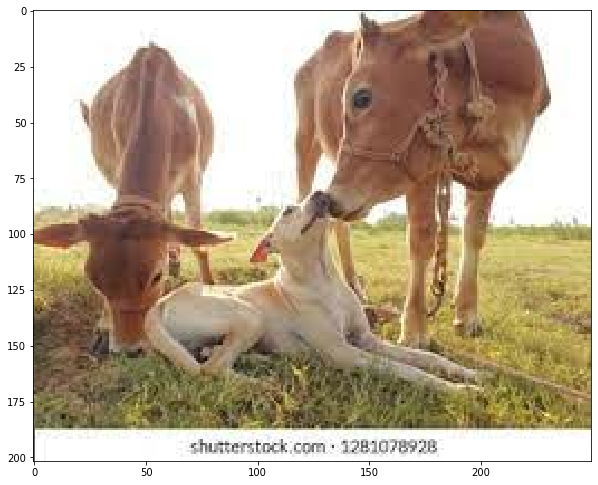

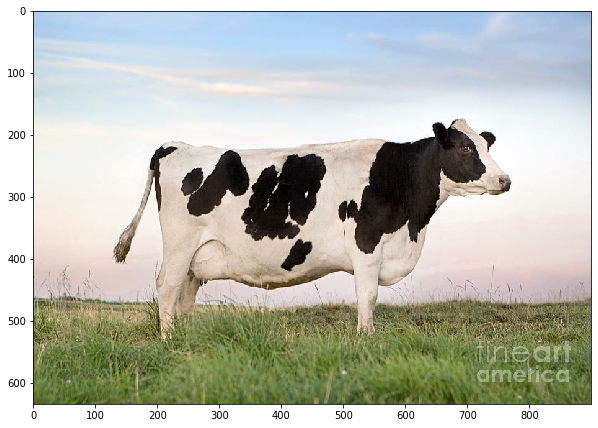

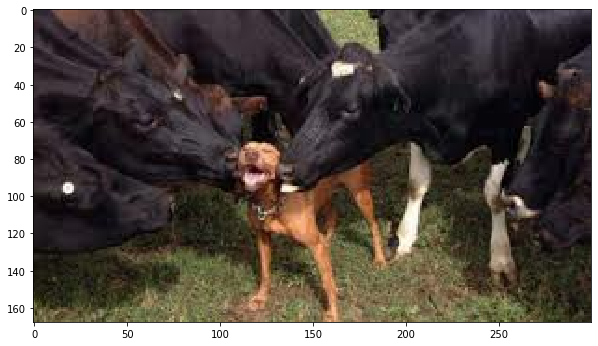

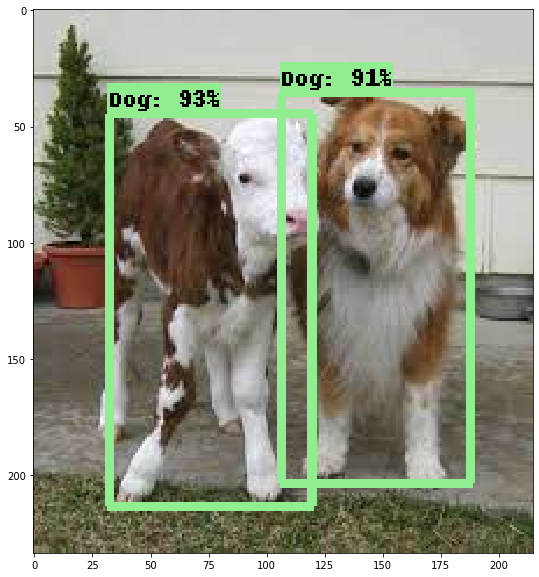

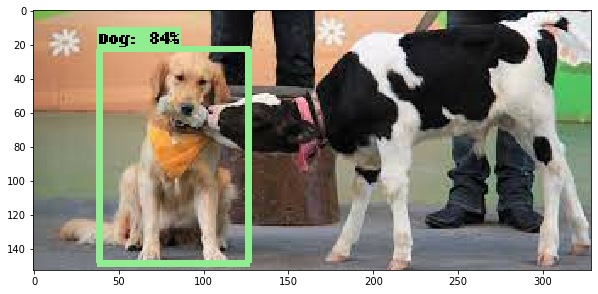

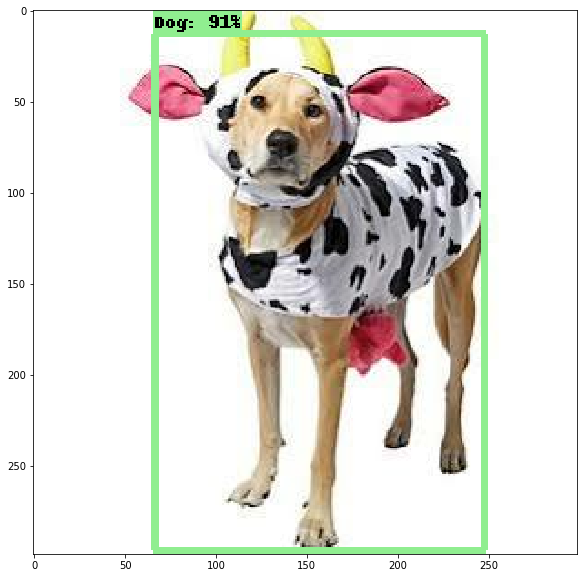

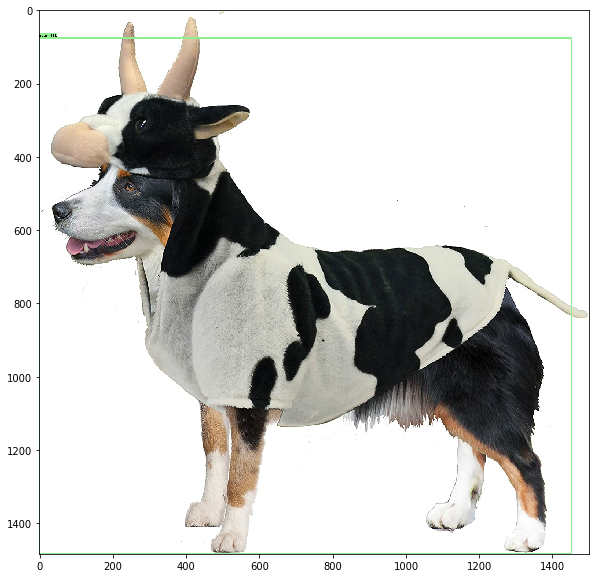

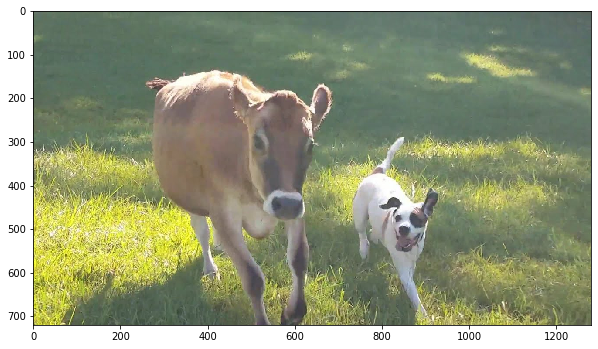

In [163]:
%matplotlib inline
import os
images_path = 'sample-jpgs'
for filename in os.listdir(images_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        #print(filename)
        file  = os.path.join(images_path, filename)
        #print(file)
        try:
            run_detector(detector, file)
        except:
            pass
    